<a href="https://colab.research.google.com/github/Epsita-R/Predictive-Analytics/blob/main/PA_Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Install yfinance if necessary
!pip install yfinance

import yfinance as yf


In [24]:
# Download the dataset for a specific stock, e.g., Apple Inc. (AAPL)
data = yf.download("AAPL", start="2018-01-01", end="2023-12-31")
data.to_csv("AAPL_stock_data.csv")


[*********************100%***********************]  1 of 1 completed


In [25]:
# Display top 5 rows
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2018-01-02 00:00:00+00:00,40.568932,43.064999,43.075001,42.314999,42.540001,102223600
2018-01-03 00:00:00+00:00,40.561863,43.057499,43.637501,42.990002,43.132500,118071600
2018-01-04 00:00:00+00:00,40.750278,43.257500,43.367500,43.020000,43.134998,89738400
2018-01-05 00:00:00+00:00,41.214222,43.750000,43.842499,43.262501,43.360001,94640000
2018-01-08 00:00:00+00:00,41.061157,43.587502,43.902500,43.482498,43.587502,82271200


**Inference**

Columns:

Price: Adjusted closing price, usually the target for prediction in time series.

Adj Close: Adjusted closing price, which accounts for dividends and stock splits.

Close, High, Low, Open: Daily prices at close, high, low, and open times.

Volume: Number of shares traded

Q1: Preprocessing

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Handle Missing Values
data = data.fillna(method='ffill').fillna(method='bfill')

# Feature Engineering

# Create lag features
data['AdjClose_Lag1'] = data['Adj Close'].shift(1)
data['AdjClose_Lag3'] = data['Adj Close'].shift(3)
data['AdjClose_Lag7'] = data['Adj Close'].shift(7)

# Create rolling features
data['AdjClose_MA3'] = data['Adj Close'].rolling(window=3).mean()
data['AdjClose_MA7'] = data['Adj Close'].rolling(window=7).mean()

# Create additional time-based features
data['DayOfWeek'] = data.index.dayofweek
data['Month'] = data.index.month

# Drop rows with NaN values created by lagged features
data = data.dropna()

<ipython-input-26-695eb37a17e5>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').fillna(method='bfill')


***Fill Missing Values***

Forward Fill (ffill): Replaces NaN values with the last known non-NaN value.

Backward Fill (bfill): If there are still NaN values after forward filling, it uses the next known value to fill them.

***Feature Engineering***

Lag Features: These represent previous values of 'Adj Close'.

*   AdjClose_Lag1: Value from the previous day.
*   AdjClose_Lag3: Value from three days ago.
*   AdjClose_Lag7: Value from seven days ago.

Rolling Features: These calculate the moving average.

*   AdjClose_MA3: The average of 'Adj Close' over the past three days.
*   AdjClose_MA7: The average of 'Adj Close' over the past seven days.

Lagged and rolling features help capture trends and patterns in time series data.

***Day of the Week***

This feature extracts the day of the week from the index (0 for Monday to 6 for Sunday).

***Month***

This feature extracts the month from the index. These features help to capture weekly trends in the data.

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
# Scaling Features
scaler = StandardScaler()
scaled_columns = ['Adj Close', 'High', 'Low', 'Open', 'Volume', 'AdjClose_Lag1', 'AdjClose_Lag3', 'AdjClose_Lag7', 'AdjClose_MA3', 'AdjClose_MA7']
data[scaled_columns] = scaler.fit_transform(data[scaled_columns])

# Additional Time-Based Features
data['Year'] = data.index.year
data['Quarter'] = data.index.quarter

# Final Check for Null Values
if data.isnull().sum().sum() > 0:
    print("Warning: There are still missing values in the data.")
else:
    print("Data is fully preprocessed with no missing values.")

# Display the processed data
data.head()


Data is fully preprocessed with no missing values.


Price,Adj Close,Close,High,Low,Open,Volume,AdjClose_Lag1,AdjClose_Lag3,AdjClose_Lag7,AdjClose_MA3,AdjClose_MA7,DayOfWeek,Month,Year,Quarter
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,,,
Date,,,,,,,,,,,,,,,
2018-01-11 00:00:00+00:00,-1.319897,43.820000,-1.323171,-1.306106,-1.316173,-0.592247,-1.322887,-1.319508,-1.323007,-1.321836,-1.322077,3,1,2018,1
2018-01-12 00:00:00+00:00,-1.311557,44.272499,-1.314078,-1.300353,-1.308363,-0.103374,-1.318324,-1.319600,-1.323146,-1.317594,-1.318872,4,1,2018,1
2018-01-16 00:00:00+00:00,-1.315704,44.047501,-1.304207,-1.297923,-1.299915,0.197015,-1.309983,-1.319785,-1.319451,-1.314674,-1.316788,1,1,2018,1
2018-01-17 00:00:00+00:00,-1.302296,44.775002,-1.304888,-1.303229,-1.308510,0.546150,-1.314131,-1.315219,-1.310354,-1.308803,-1.314084,2,1,2018,1
2018-01-18 00:00:00+00:00,-1.301559,44.814999,-1.300755,-1.287459,-1.292695,0.314880,-1.300719,-1.306872,-1.313355,-1.305468,-1.310846,3,1,2018,1


***StandardScaler***

Scales the features by removing the mean and scaling to unit variance. It's useful when the features have different units or scales, which can negatively affect many machine learning algorithms.

***Extracting Year and Quarter***

Adding two new features to the DataFrame:

*   Year: The year extracted from the date index.
*   Quarter: The quarter of the year (1 to 4) also extracted from the date index.

Adding these time-based features can help in capturing seasonality effects in time series forecasting. Many financial datasets exhibit yearly and quarterly trends.





Q2: EDA

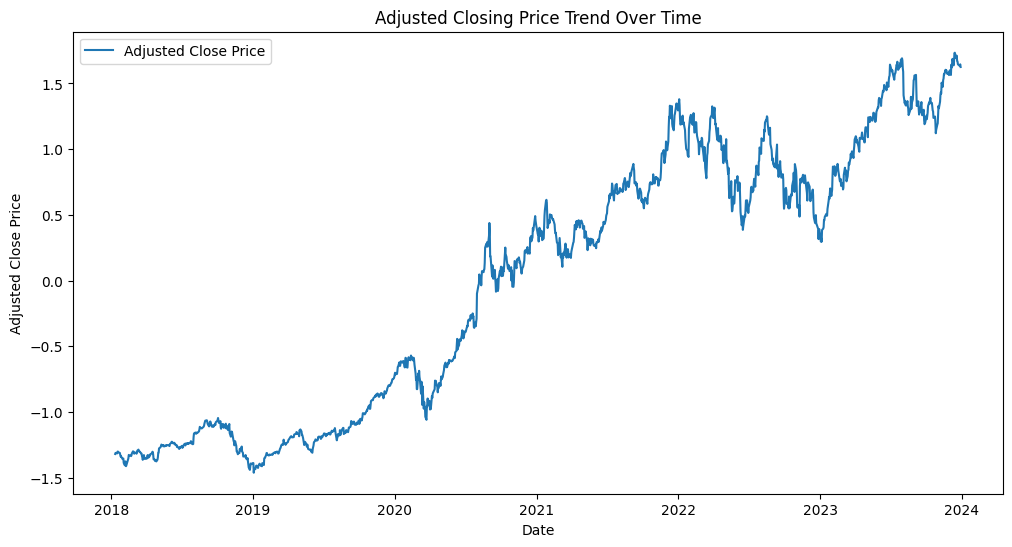

In [29]:
import matplotlib.pyplot as plt

# Setting the 'Date' column as the index if not already set (although it appears to be set already)
data.index = pd.to_datetime(data.index)  # Ensure the index is in datetime format if not already

# Plotting the Adjusted Closing Price over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Adj Close'], label='Adjusted Close Price')
plt.title('Adjusted Closing Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

**Inference:**

The stock price has generally increased over the period. There are some ups and downs, but the overall direction is upward.

The price seems to have been increasing more rapidly in the most recent years.

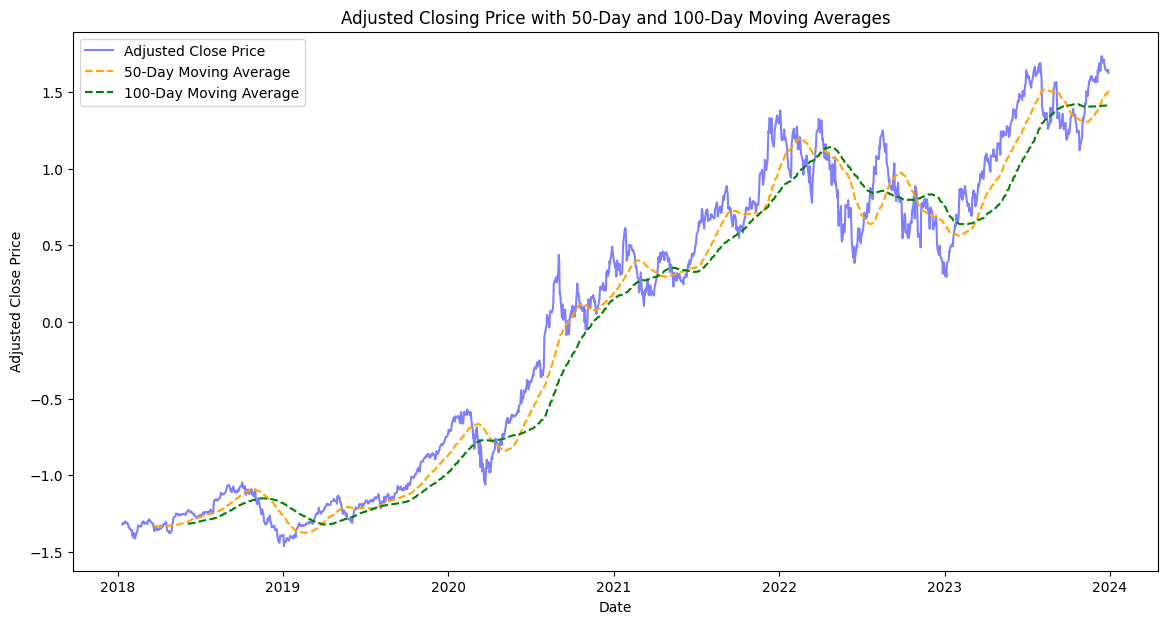

In [30]:
# Calculate 50-day and 100-day moving averages
data['MA_50'] = data['Adj Close'].rolling(window=50).mean()
data['MA_100'] = data['Adj Close'].rolling(window=100).mean()

# Plot the adjusted closing price along with the moving averages
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Adj Close'], label='Adjusted Close Price', color='blue', alpha=0.5)
plt.plot(data.index, data['MA_50'], label='50-Day Moving Average', color='orange', linestyle='--')
plt.plot(data.index, data['MA_100'], label='100-Day Moving Average', color='green', linestyle='--')

# Adding title and labels
plt.title('Adjusted Closing Price with 50-Day and 100-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()


Inference:

50-Day Moving Average: This line is generally following the upward trend of the stock price. It's closer to the actual price than the 100-day moving average, making it more sensitive to recent price changes.

100-Day Moving Average: This line is also trending upward, but it's smoother than the 50-day average. It's less sensitive to recent price fluctuations and gives a longer-term view of the trend.

The recent movement of the 50-day moving average below the 100-day moving average might suggest a potential shift in the trend.

**Inference:**

Looking at the blue line, the stock price has been going up over time.



Shape of adjusted close series: (1502,)
Type of adjusted close series: <class 'pandas.core.series.Series'>


<ipython-input-36-6cea3a98346e>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(data.index[peaks], adj_close_series[peaks], "v", label="Peaks", color="green", markersize=8)
<ipython-input-36-6cea3a98346e>:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(data.index[dips], adj_close_series[dips], "^", label="Dips", color="red", markersize=8)


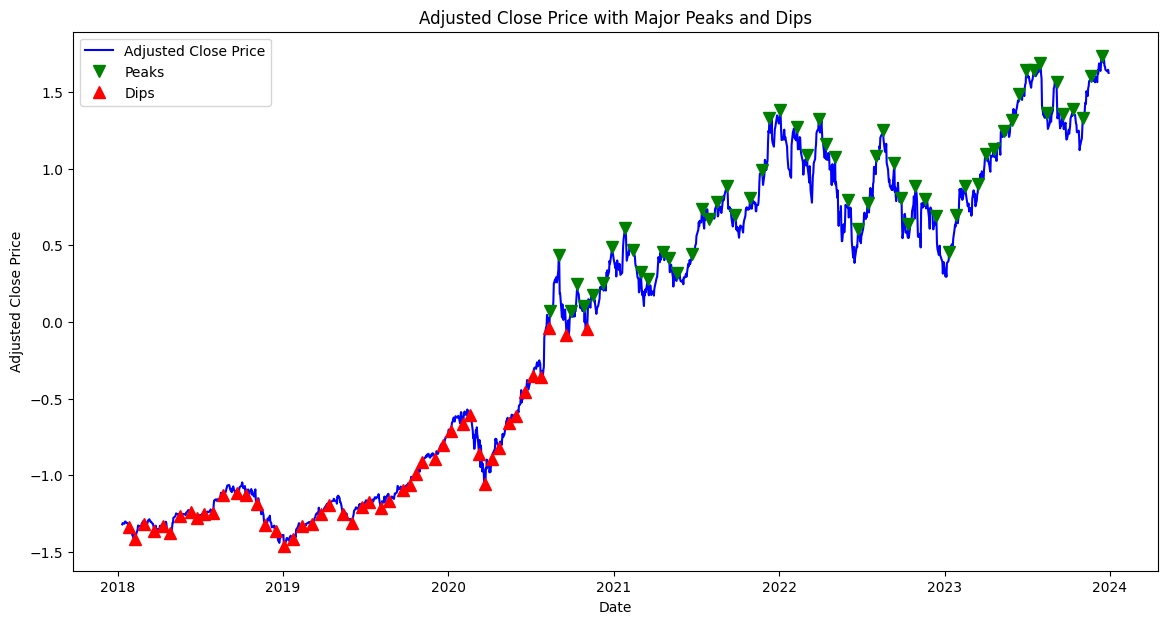

In [36]:
from scipy.signal import find_peaks

# 'Adj Close' is treated as a Series
adj_close_series = data['Adj Close'].squeeze()

# Check the shape and type
print("Shape of adjusted close series:", adj_close_series.shape)
print("Type of adjusted close series:", type(adj_close_series))

# Find peaks (local maxima) and dips (local minima)
peaks, _ = find_peaks(adj_close_series, distance=10, height=0)
dips, _ = find_peaks(-adj_close_series, distance=10, height=0)

# Plot the adjusted closing price along with peaks and dips
plt.figure(figsize=(14, 7))
plt.plot(data.index, adj_close_series, label='Adjusted Close Price', color='blue')

# Mark peaks
plt.plot(data.index[peaks], adj_close_series[peaks], "v", label="Peaks", color="green", markersize=8)

# Mark dips
plt.plot(data.index[dips], adj_close_series[dips], "^", label="Dips", color="red", markersize=8)

# Add title, labels, and legend
plt.title('Adjusted Close Price with Major Peaks and Dips')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()


Q4: Time Series Visualization

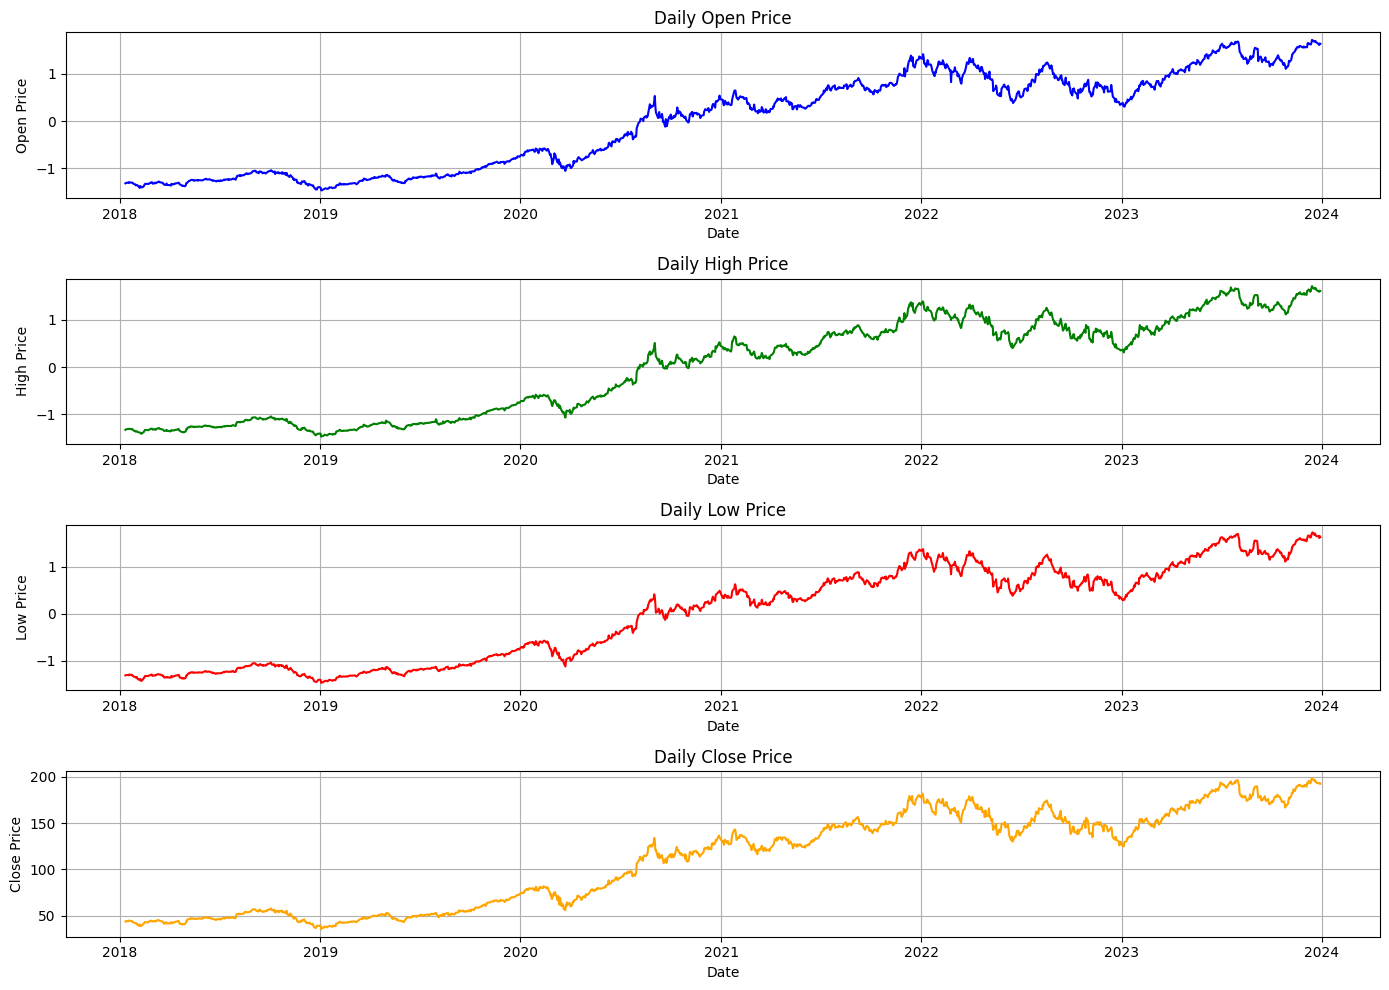

In [38]:
# Set the size of the plots
plt.figure(figsize=(14, 10))

# Subplot for Open prices
plt.subplot(4, 1, 1)
plt.plot(data.index, data['Open'], label='Open Price', color='blue')
plt.title('Daily Open Price')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.grid()

# Subplot for High prices
plt.subplot(4, 1, 2)
plt.plot(data.index, data['High'], label='High Price', color='green')
plt.title('Daily High Price')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.grid()

# Subplot for Low prices
plt.subplot(4, 1, 3)
plt.plot(data.index, data['Low'], label='Low Price', color='red')
plt.title('Daily Low Price')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.grid()

# Subplot for Close prices
plt.subplot(4, 1, 4)
plt.plot(data.index, data['Close'], label='Close Price', color='orange')
plt.title('Daily Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**Inference:**

The open price is usually lower than the high price for the day, as the stock price tends to increase during the trading session.

The close price is often between the high and low prices, reflecting the final price at the end of the trading day.

The overall upward trend in all four charts suggests a positive market sentiment for the stock.


Q5: Volatility Analysis

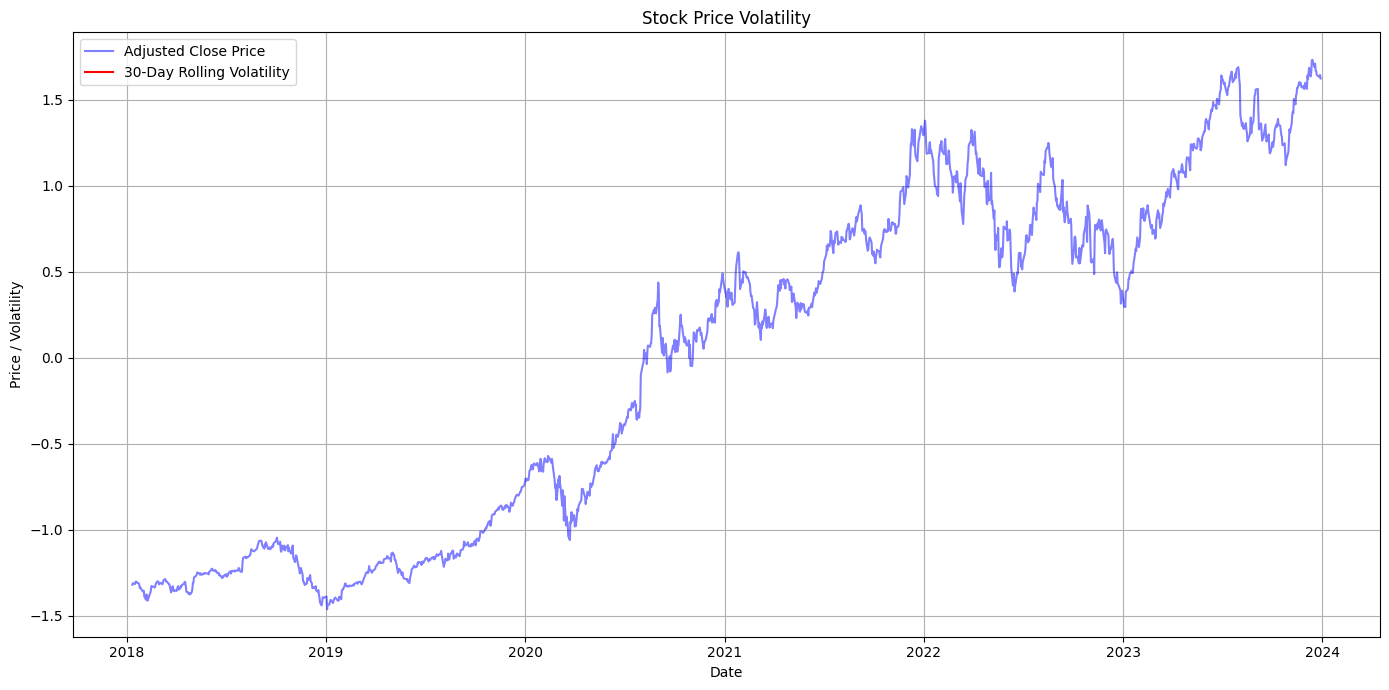

In [44]:

# Calculate the rolling standard deviation for a specified window (e.g., 30 days)
window = 30
data['Volatility'] = data['Adj Close'].rolling(window=window).std()

# Set the size of the plots
plt.figure(figsize=(14, 7))

# Plot Adjusted Close Price
plt.plot(data.index, data['Adj Close'], label='Adjusted Close Price', color='blue', alpha=0.5)

# Plot Rolling Volatility
plt.plot(data.index, data['Volatility'], label=f'30-Day Rolling Volatility', color='red')

# Add titles and labels
plt.title('Stock Price Volatility')
plt.xlabel('Date')
plt.ylabel('Price / Volatility')
plt.legend()
plt.grid()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**Inference:**

There are periods of rapid increase and slower growth, indicating some volatility in the stock's performance.

The 30-day rolling volatility line shows the level of price fluctuation over a 30-day period.

Higher peaks in the volatility line indicate periods of higher price fluctuations. Lower points in the volatility line indicate periods of lower price fluctuations.

The volatility line shows some fluctuations over time, suggesting periods of increased and decreased market volatility.

There is no strong correlation between the price and volatility.

Q5: Forecasting

In [48]:
pip install pandas matplotlib statsmodels

Columns in the DataFrame: Index(['Close'], dtype='object')
ADF Statistic: -21.47736540528658
p-value: 0.0


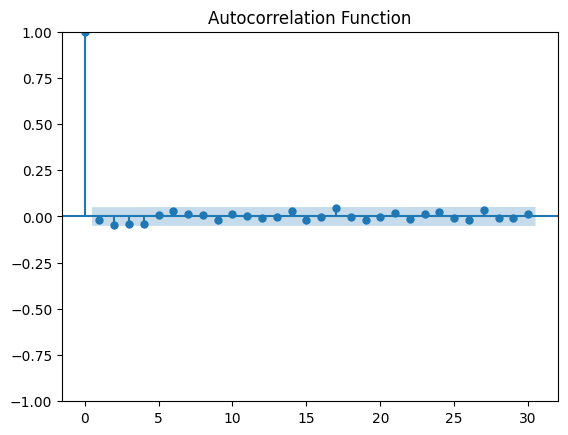

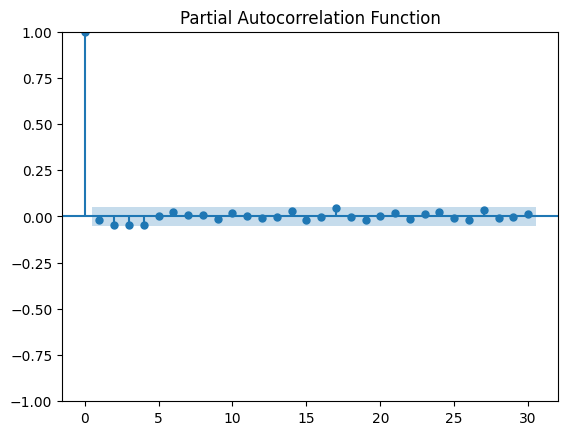

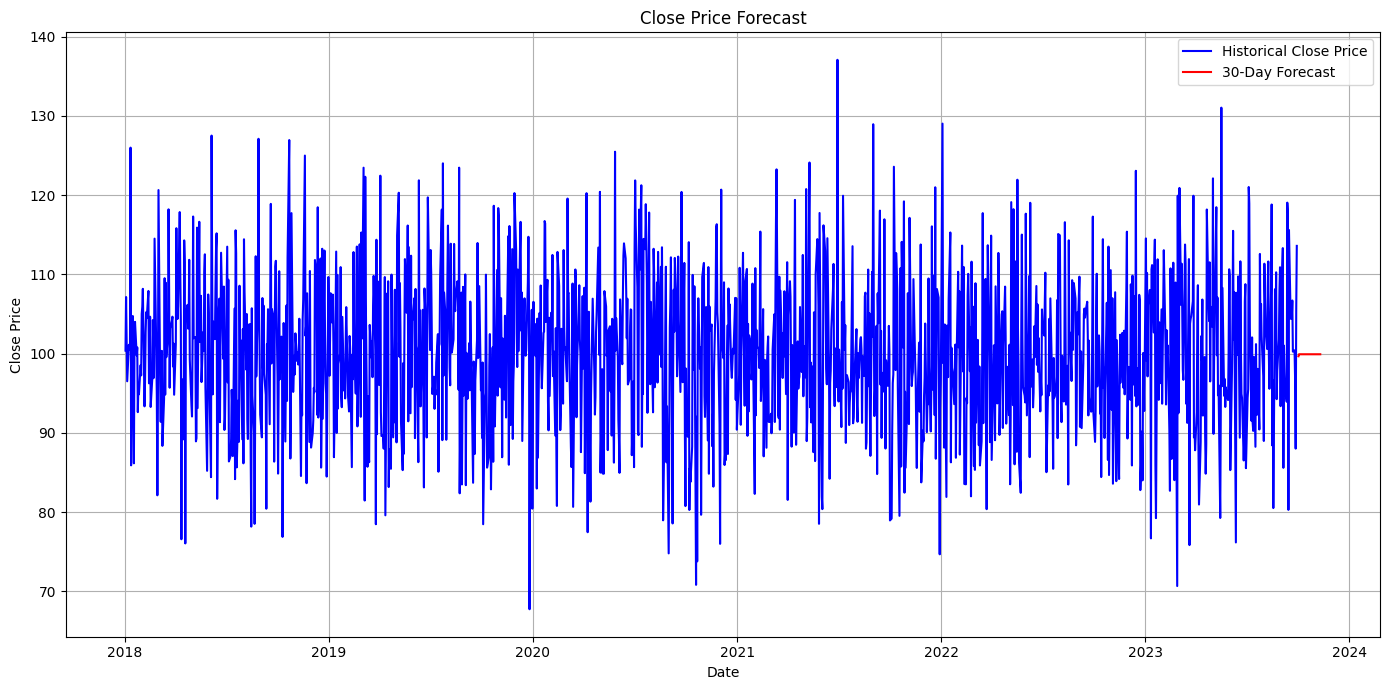

In [56]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Check the columns in the DataFrame
print("Columns in the DataFrame:", data.columns)

try:
    # Check if 'Close' exists
    if 'Close' in data.columns:
        close_series = data['Close']
    else:
        raise KeyError("No suitable 'Close' column found in the DataFrame.")

    # Ensure 'Close' is numeric
    close_series = pd.to_numeric(close_series, errors='coerce')

    # Drop NaN values if any
    close_series = close_series.dropna()

    # Check for Stationarity
    result = adfuller(close_series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])

    # If p-value > 0.05, the series is non-stationary
    if result[1] > 0.05:
        close_series = close_series.diff().dropna()

    # Visualize ACF and PACF
    plot_acf(close_series, lags=30)
    plt.title('Autocorrelation Function')
    plt.show()

    plot_pacf(close_series, lags=30)
    plt.title('Partial Autocorrelation Function')
    plt.show()

    # Fit the ARIMA Model
    model = ARIMA(close_series, order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast the next 30 days
    forecast = model_fit.forecast(steps=30)

    # Prepare the index for the forecasted values
    last_date = data.index[-1]
    forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='B')

    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Close'], label='Historical Close Price', color='blue')
    plt.plot(forecast_index, forecast, label='30-Day Forecast', color='red')
    plt.title('Close Price Forecast')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

except KeyError as e:
    print(e)


**Inference:**

Autocorrelation measures the correlation between a time series and a lagged version of itself. In simpler terms, it tells us how much the current value of a time series is related to its past values.

Horizontal Axis: Represents the lag, or the number of time periods we are looking back.

Vertical Axis: Represents the correlation coefficient, which ranges from -1 to 1.

The ACF plot shows that the time series has no significant autocorrelation at any lag. The spikes are close to zero and within the confidence bands. The current value of the series is not strongly influenced by its past values.

Historical Price:

The stock price has fluctuated significantly over the past few years.
There are periods of high volatility and periods of relative stability.
The overall trend is not clear, with periods of both upward and downward movements.

 30-Day Forecast:

The 30-day forecast shows a flat line, the model predicts a stable price over the next 30 days.
The forecast line is close to the historical price range, indicating that there is potential for price fluctuations within the current range.